# Logistic Regression Implementation on Diabetes dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Rajan\Downloads\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
column = df.columns
column

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()
#No missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

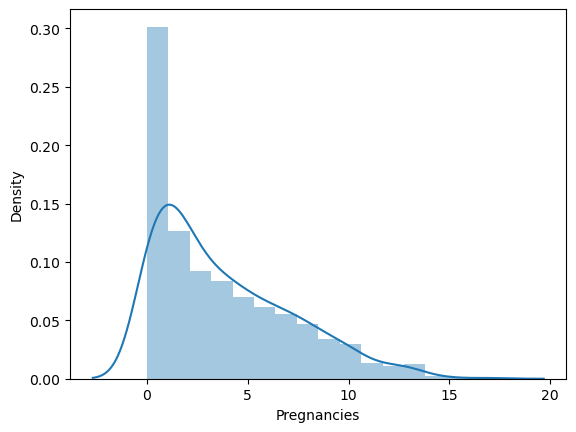

In [55]:
sns.distplot(df['Pregnancies'])

In [85]:
for feature in df.columns:
    print("{} has {} no of unique categories".format(feature, df[feature].nunique()))

Pregnancies has 17 no of unique categories
Glucose has 136 no of unique categories
BloodPressure has 47 no of unique categories
SkinThickness has 51 no of unique categories
Insulin has 186 no of unique categories
BMI has 248 no of unique categories
DiabetesPedigreeFunction has 517 no of unique categories
Age has 52 no of unique categories
Outcome has 2 no of unique categories


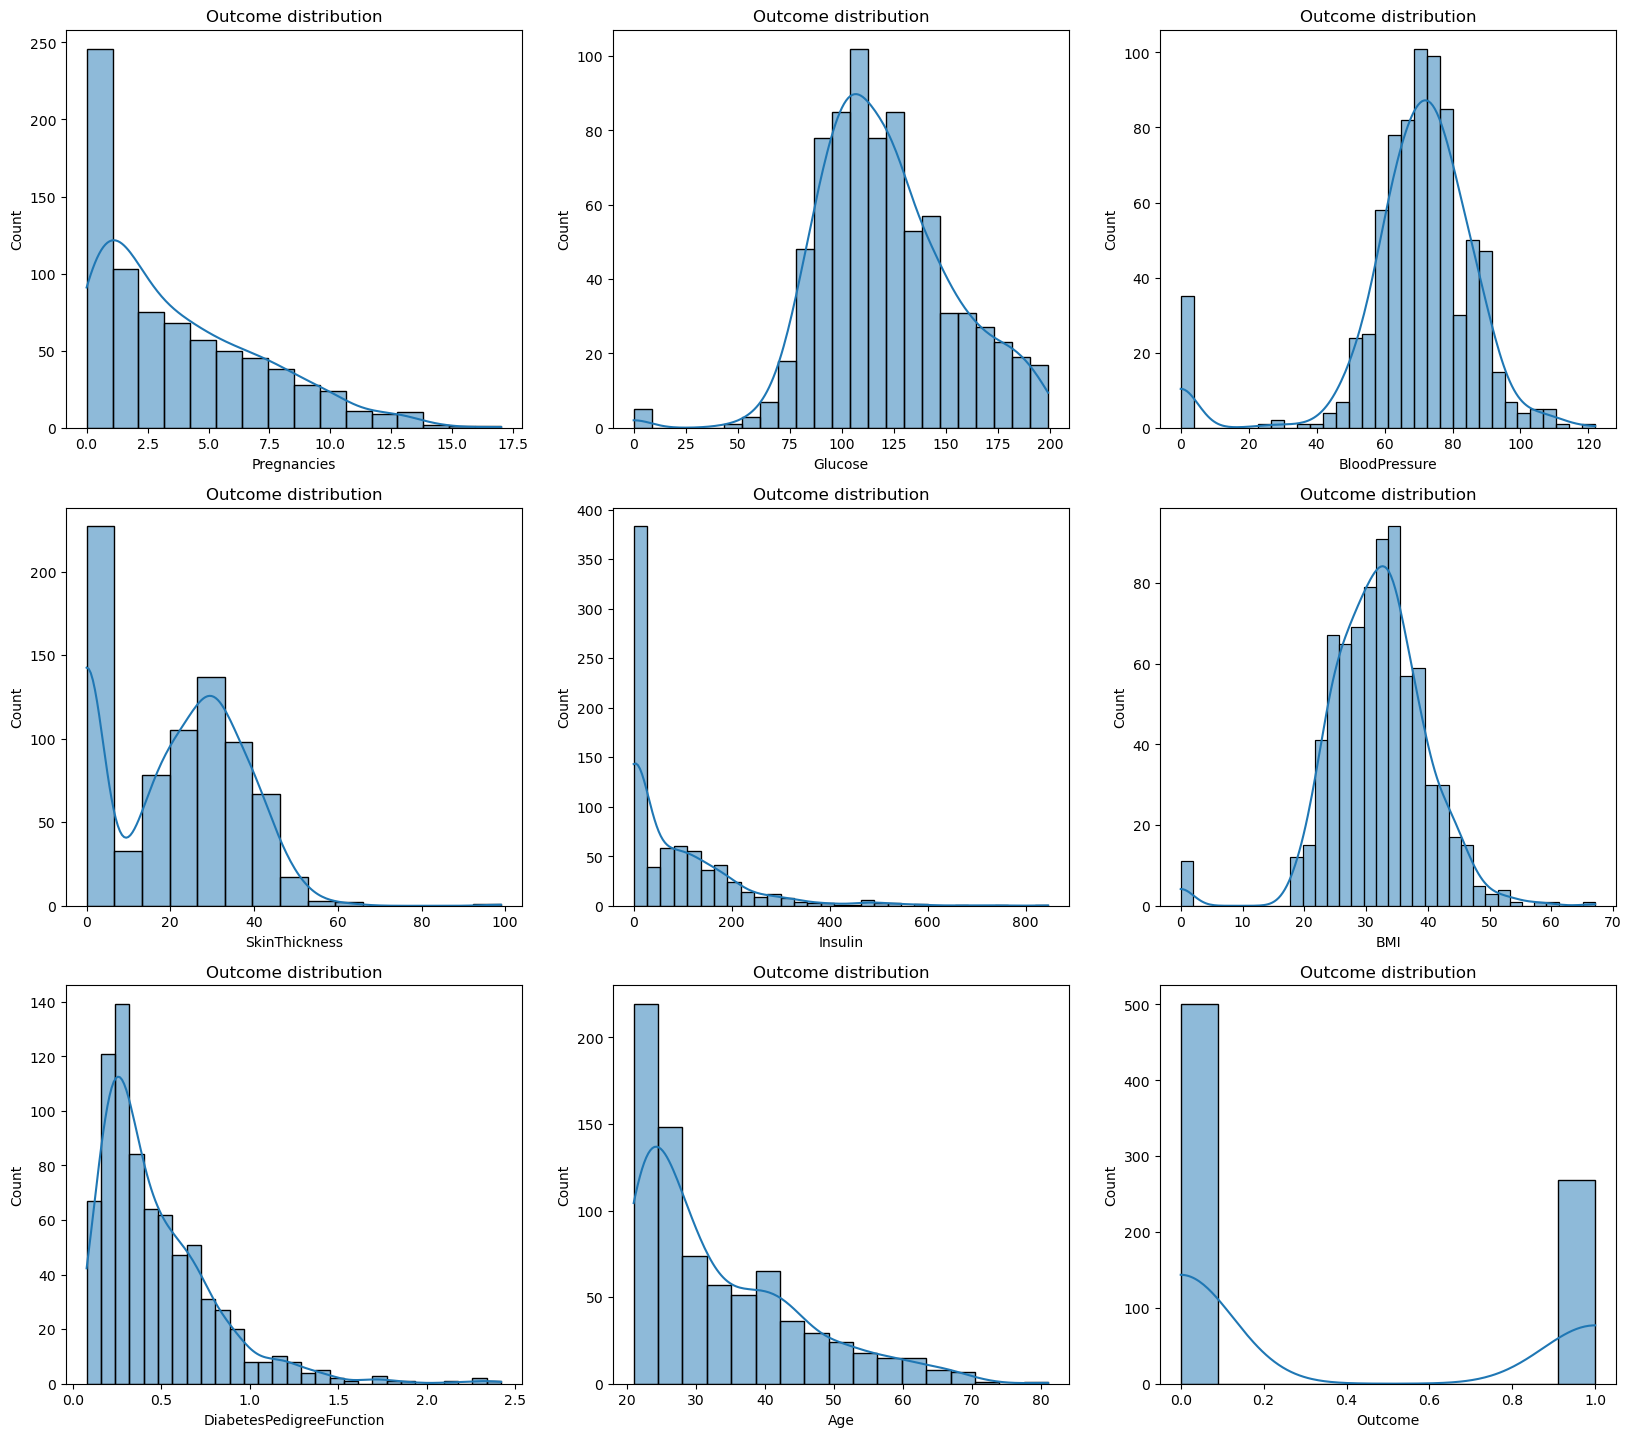

In [105]:
plt.figure(figsize=(20,30),facecolor='white')
for i in enumerate(df.columns):
    plt.subplot(5,3, i[0]+1)
    sns.histplot(data = df, x=i[1], kde = True)
    plt.title("{} distribution".format(feature))

Observation:
   we can see there, few data for features Glucose, Insulin, skin thickness, BMI and Blood Pressure have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. 
we can either remove such data or simply replace it with their respective mean values. 

In [106]:
#replacing Zero values with the Mean of their respective features

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

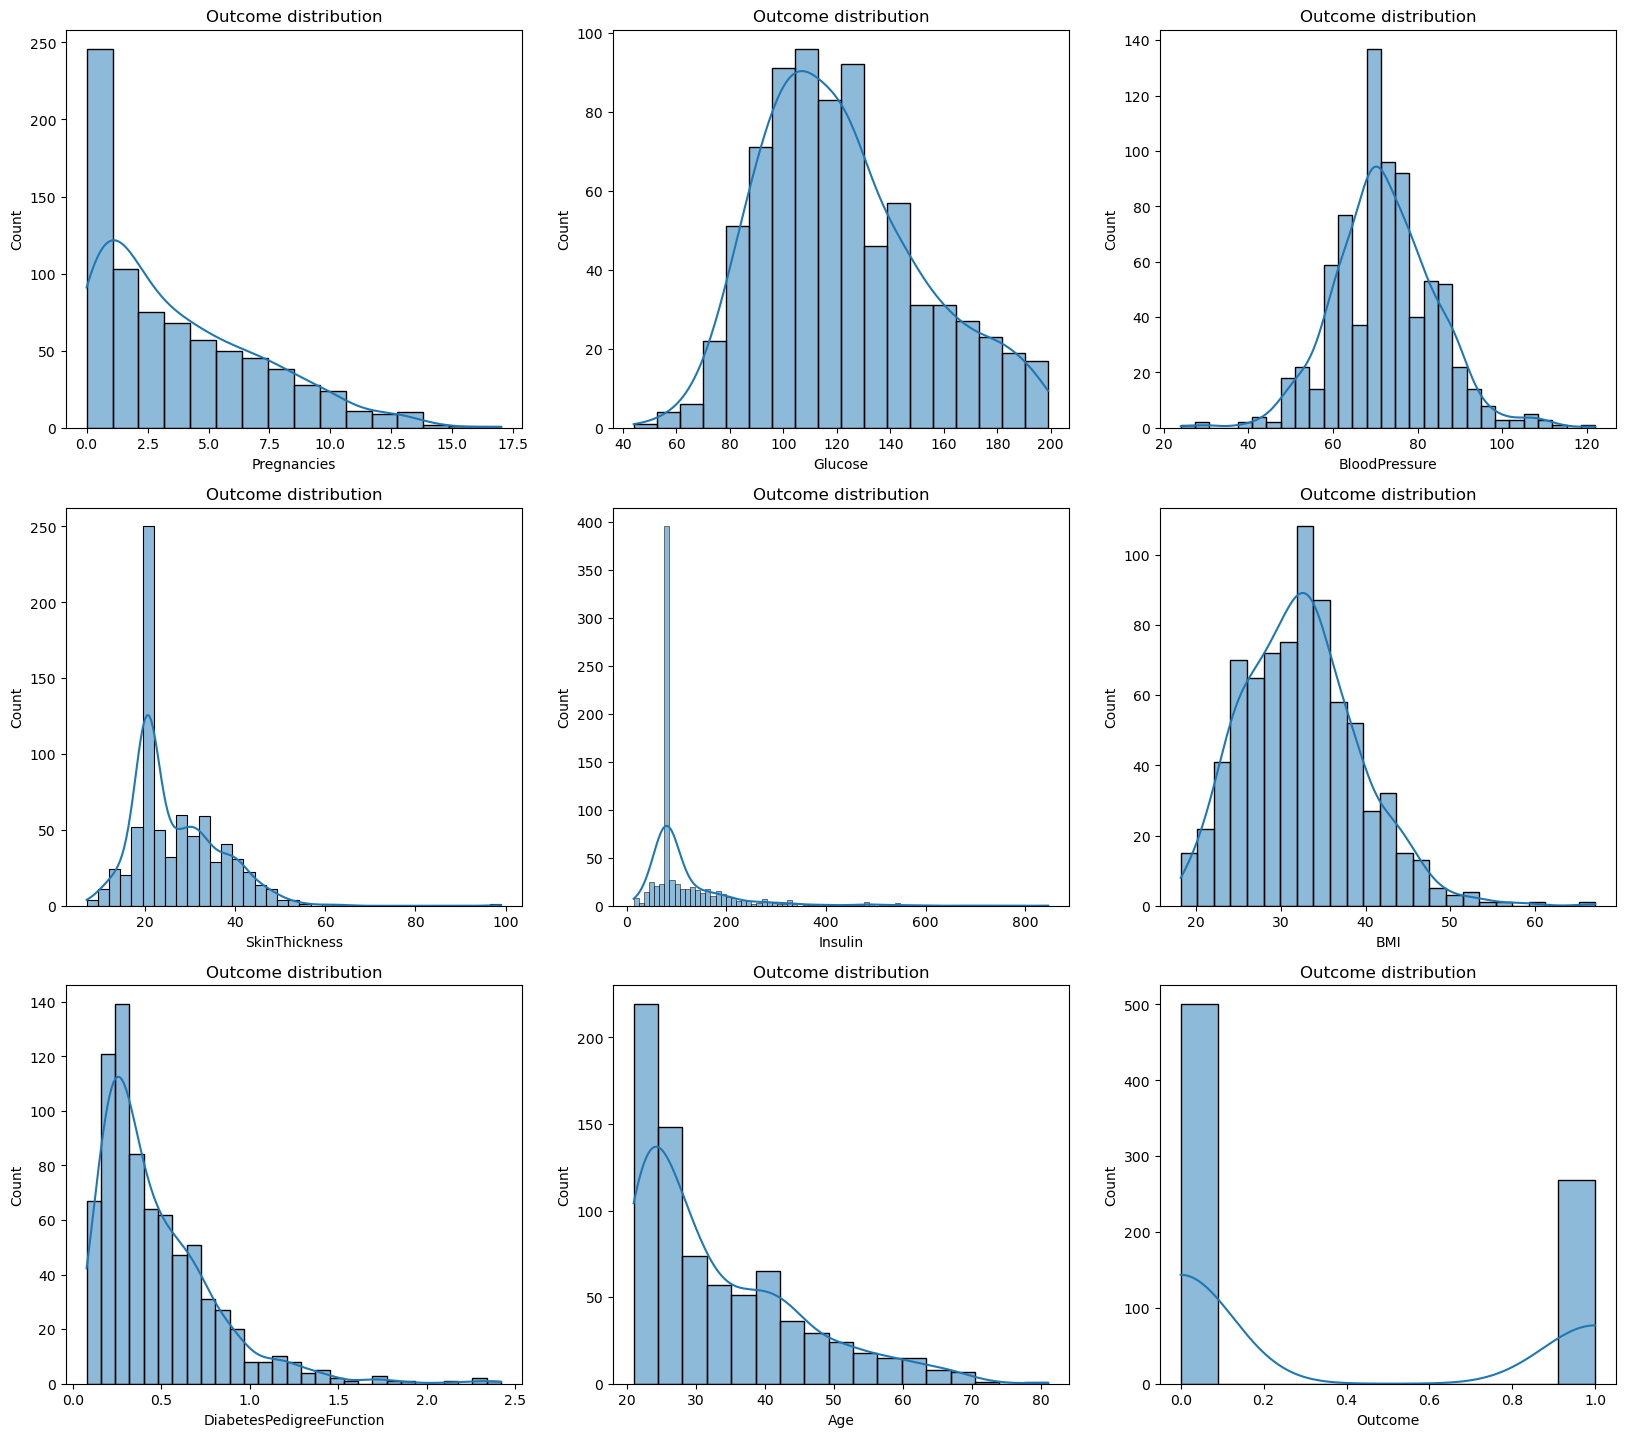

In [107]:
#Now plot again
plt.figure(figsize=(20,30),facecolor='white')
for i in enumerate(df.columns):
    plt.subplot(5,3, i[0]+1)
    sns.histplot(data = df, x=i[1], kde = True)
    plt.title("{} distribution".format(feature))

In [108]:
#Observation: After replacing Zero with Mean, skewness got a little smoother

Checking for Outliers

<AxesSubplot:>

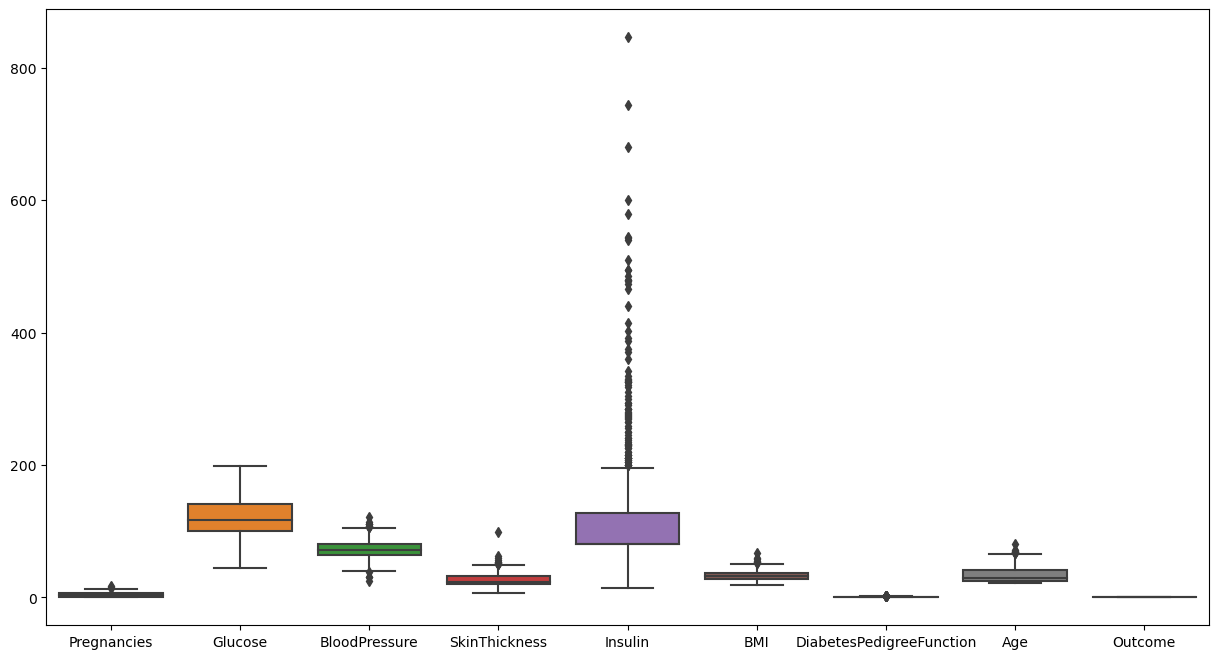

In [109]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

Obseravtion:
    
    Glucose has Zero outliers
    Pregnancies has some outliers on upper boundary side
    BloodPressure  has outliers on both boundary
    Skin Thickness , BMI, and Age have outliers on upper boundary side
    Insulin has large no of outliers on upper boundary side

In [114]:
# Trimming Outliers

q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
df_clean = df[df['Pregnancies']<q]

q = df_clean['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
df_clean  = df_clean[df_clean['BMI']<q]

q = df_clean['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
df_clean  = df_clean[df_clean['SkinThickness']<q]

q = df_clean['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
df_clean  = df_clean[df_clean['Insulin']<q]

q = df_clean['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
df_clean  = df_clean[df_clean['DiabetesPedigreeFunction']<q]

q = df_clean['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
df_clean  = df_clean[df_clean['Age']<q]

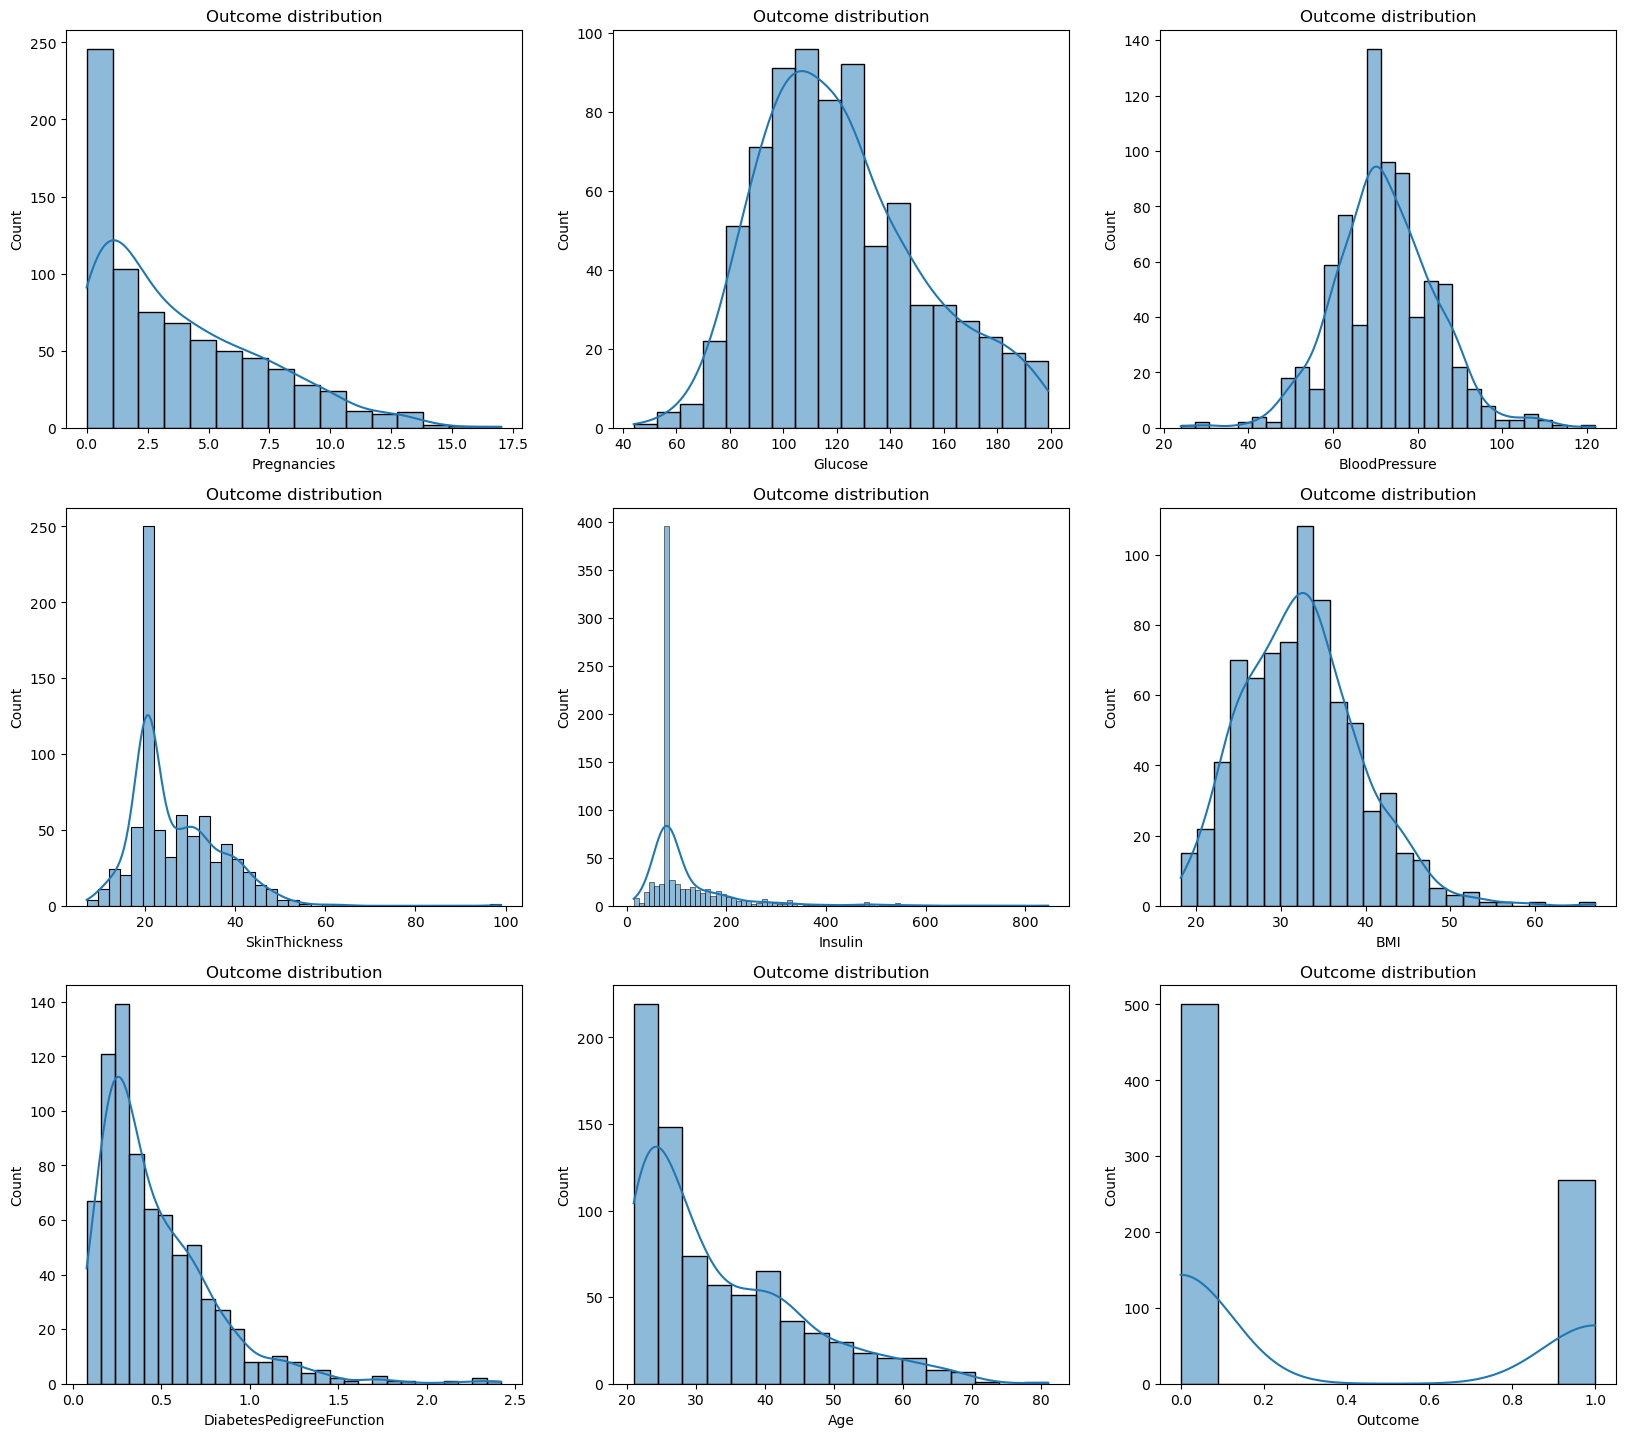

In [115]:
#Now lets see again the distribution
plt.figure(figsize=(20,30),facecolor='white')
for i in enumerate(df_clean.columns):
    plt.subplot(5,3, i[0]+1)
    sns.histplot(data = df, x=i[1], kde = True)
    plt.title("{} distribution".format(feature))

In [117]:
X = df_clean.drop(columns = ['Outcome'])
y = df_clean['Outcome']

In [118]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [119]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [122]:
X_train.shape

(451, 8)

In [123]:
y_train.shape

(451,)

In [124]:
X_test.shape

(223, 8)

In [125]:
y_test.shape

(223,)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [127]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [128]:
X_train

array([[-0.85269427, -0.19196391, -0.61377295, ...,  0.30744906,
         0.33791482, -1.02774288],
       [ 0.84441568,  0.21810907,  0.57156131, ..., -0.66829684,
         0.41442937,  1.59202642],
       [-0.17385029, -0.36282766, -0.78310642, ..., -0.92849574,
        -0.77502402, -0.65349012],
       ...,
       [-0.51327228,  1.24329154,  0.23289438, ..., -0.83092115,
        -0.0446579 , -0.46636375],
       [-0.51327228, -0.05527292,  1.58756211, ..., -1.0585952 ,
        -0.46200997, -1.02774288],
       [ 0.50499369, -1.38801013, -1.96844068, ...,  0.32371149,
         0.72396548, -0.65349012]])

In [129]:
X_test

array([[-0.25112489,  1.66394342,  0.04190045, ..., -0.35241768,
        -0.65209057, -0.21043985],
       [-0.89113462,  0.636173  , -2.31401645, ..., -0.5287681 ,
         0.72812612, -0.99841144],
       [ 0.38888484,  0.19080581,  0.37846001, ..., -0.39650529,
        -0.04064743,  0.57753175],
       ...,
       [ 1.98890916,  1.62968441,  0.04190045, ...,  0.83794768,
         0.30977028,  0.05221735],
       [ 1.98890916,  0.1565468 , -0.29465911, ..., -0.17606726,
        -0.8773591 ,  0.66508415],
       [-0.89113462, -0.87122363, -1.136058  , ..., -1.2341698 ,
        -0.6806961 , -0.99841144]])

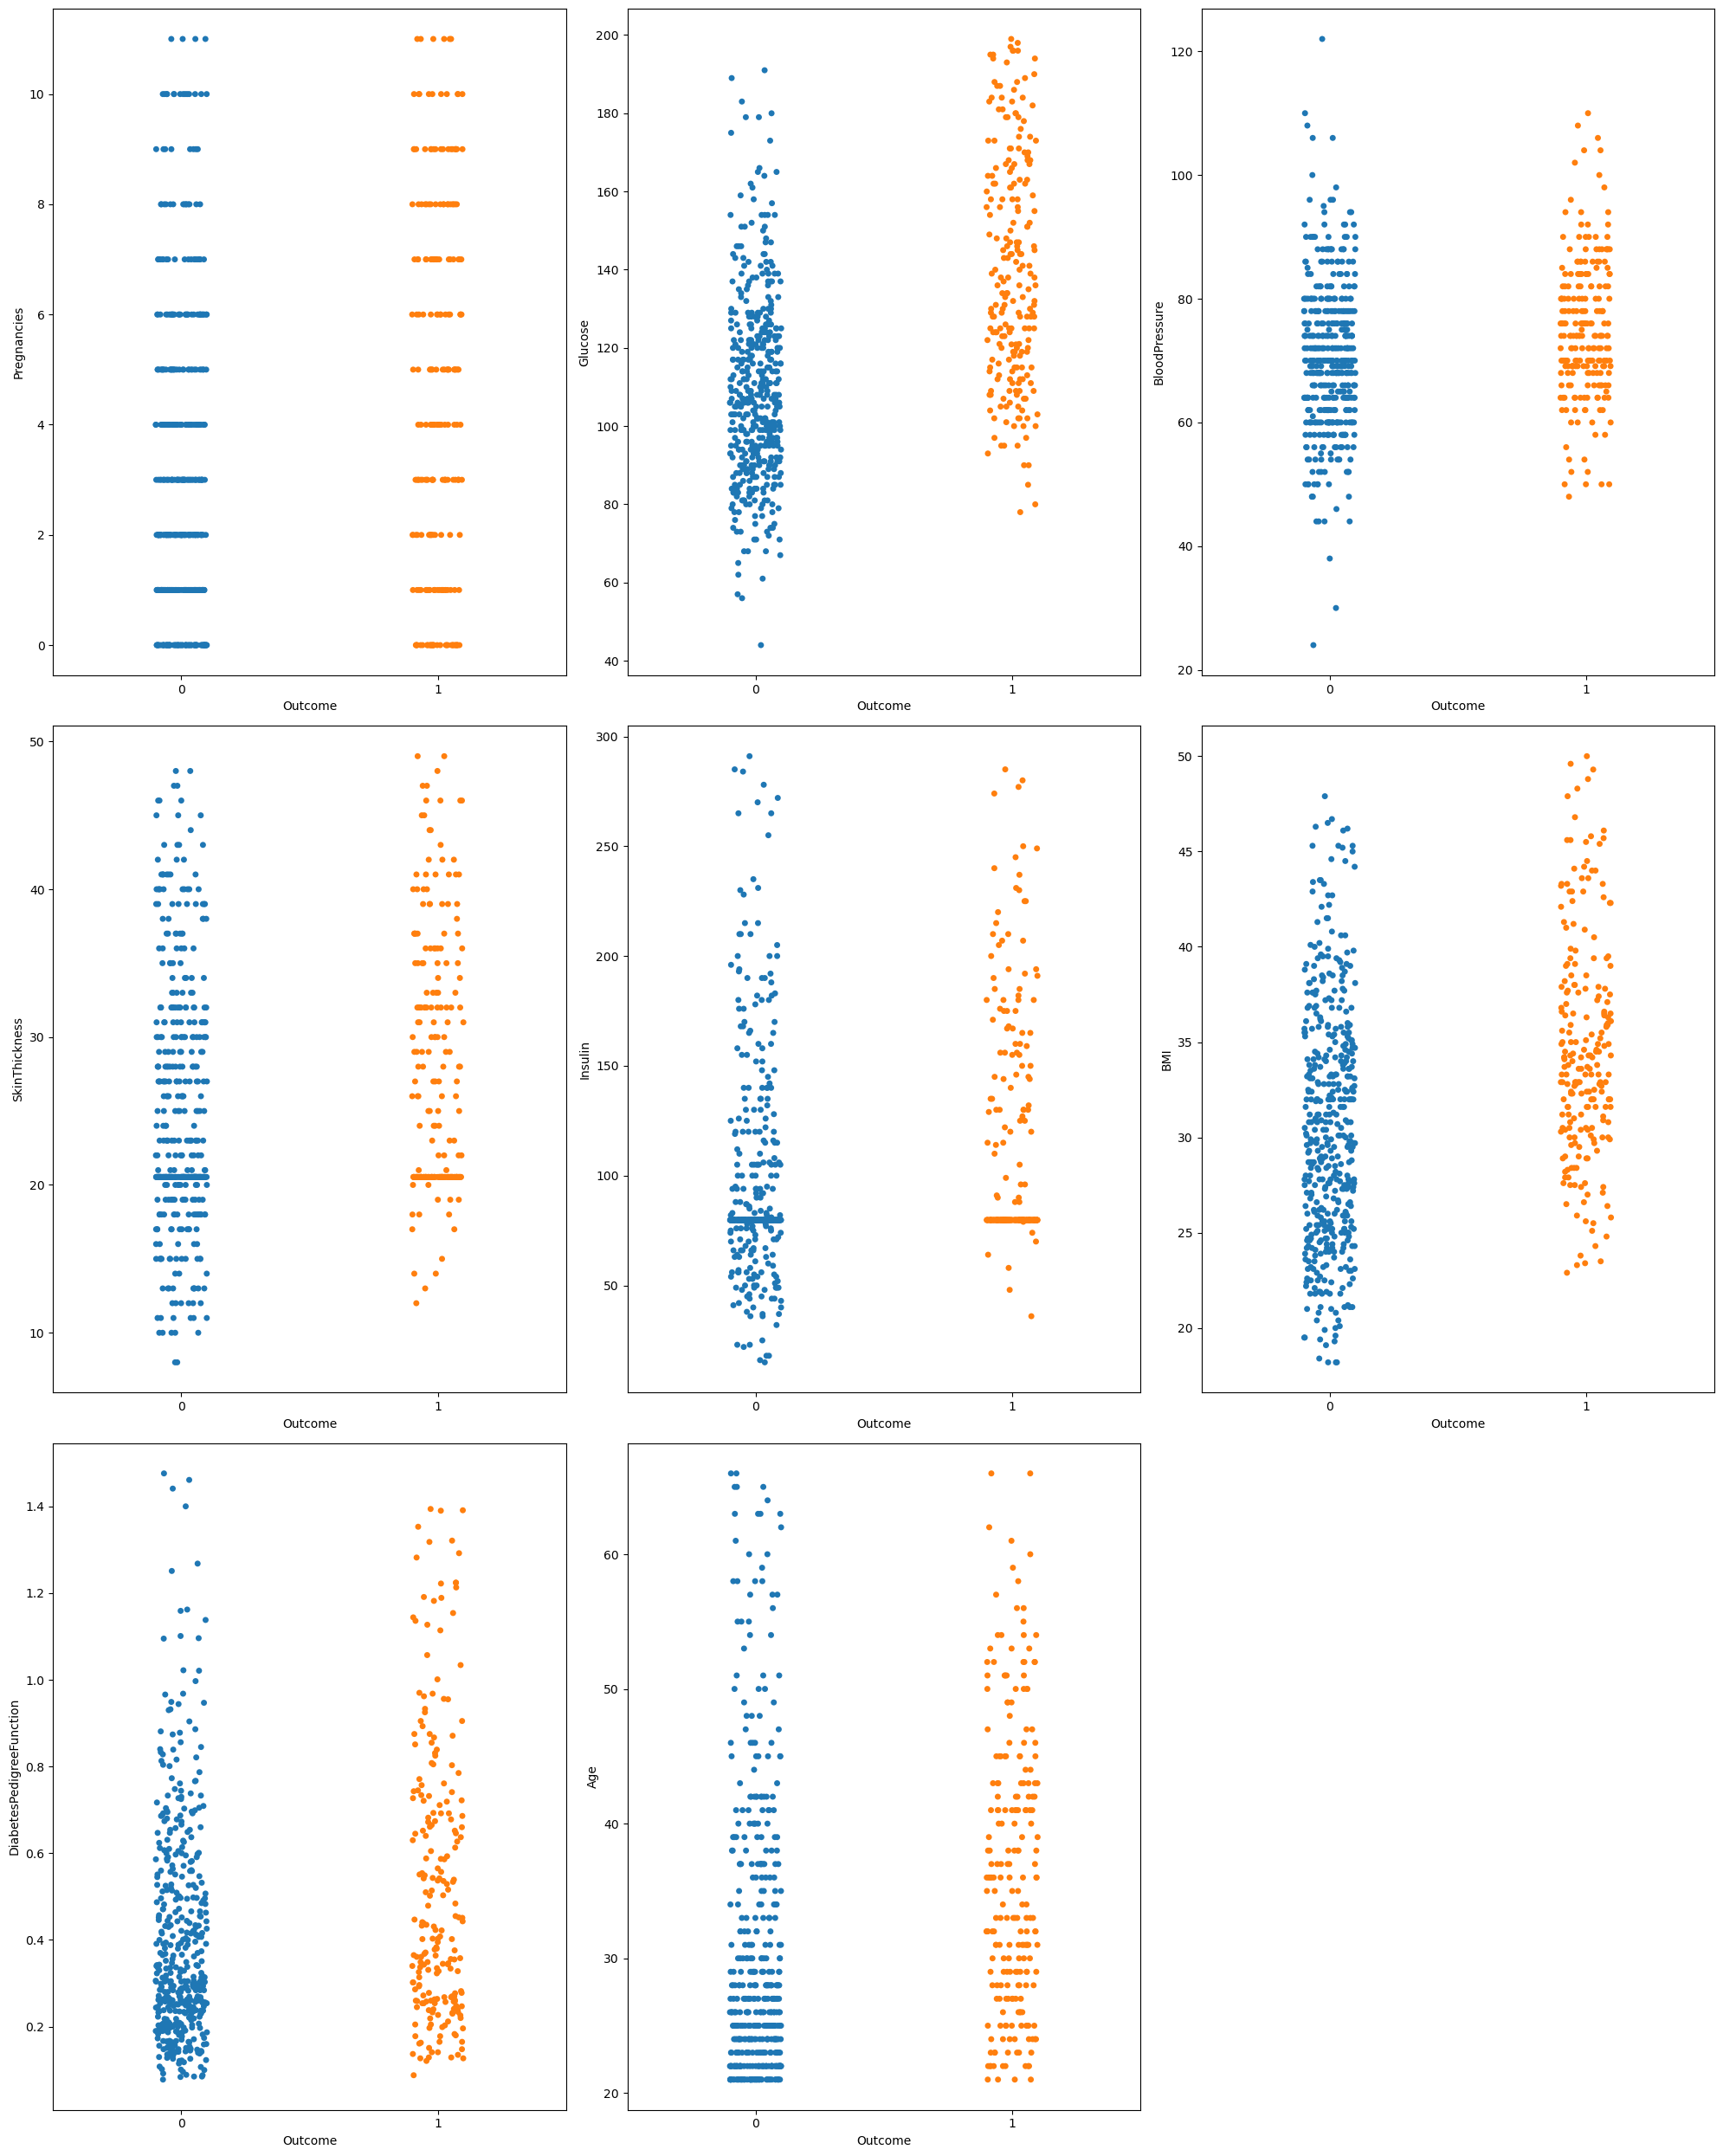

In [135]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [136]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [137]:
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [140]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


In [141]:
from sklearn.linear_model  import LogisticRegression

In [143]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [145]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [147]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [148]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7892376681614349

In [149]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[136,  15],
       [ 32,  40]], dtype=int64)

In [150]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [151]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7892376681614349

In [152]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9006622516556292

In [153]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8095238095238095

In [154]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.852664576802508

ROC

In [155]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [157]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7281089036055924

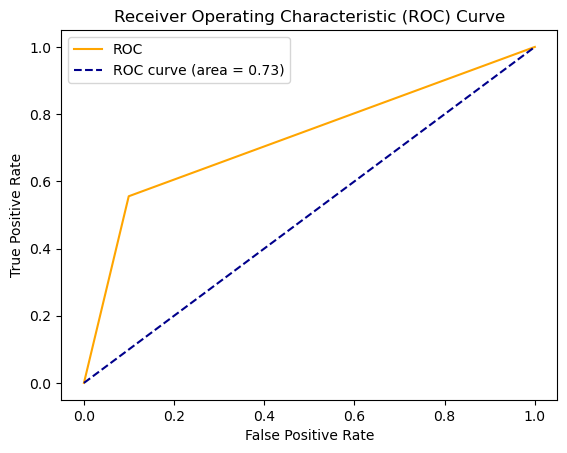

In [158]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()